In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [76]:
filename = 'data_meteoblue/'+'history_export_2017-07-10T14_30_52.csv'

In [77]:
data = pd.read_csv(filename, sep=';' , header=10)#, delimiter=None, header='infer'

In [78]:
data

,Year,Month,Day,Hour,Minute,Temperature [2 m above gnd],Relative humidity [2 m above gnd],Total Precipitation [sfc],Total cloud cover [sfc],High cloud cover [high cld lay],Medium cloud cover [mid cld lay],Low cloud cover [low cld lay],Shortwave Radiation - backwards [sfc],Wind speed [10 m above gnd],Wind direction [10 m above gnd],Wind speed [900 mb],Wind direction [900 mb],Wind Gust [sfc]
0,2017,6,26,0,0,18.59,66.0,0.0,0.0,0.0,0.0,0.0,0.00,0.70,180.00,3.94,66.04,0.9
1,2017,6,26,1,0,18.34,66.0,0.0,0.0,0.0,0.0,0.0,0.00,1.48,208.30,3.95,81.25,1.3
2,2017,6,26,2,0,17.16,72.0,0.0,0.0,0.0,0.0,0.0,0.00,0.30,180.00,3.21,95.36,0.8
3,2017,6,26,3,0,16.18,77.0,0.0,5.7,19.0,0.0,0.0,0.00,0.30,180.00,2.94,107.82,2.0
4,2017,6,26,4,0,15.55,79.0,0.0,8.1,27.0,0.0,0.0,0.00,0.45,206.57,2.55,138.18,2.1
5,2017,6,26,5,0,16.37,77.0,0.0,2.1,7.0,0.0,0.0,76.54,0.32,18.43,2.32,172.57,1.0
6,2017,6,26,6,0,18.02,76.0,0.0,7.8,26.0,0.0,0.0,232.29,0.28,135.00,2.19,204.23,1.2
7,2017,6,26,7,0,20.30,72.0,0.0,2.7,9.0,0.0,0.0,390.71,0.57,45.00,1.53,168.69,0.8
8,2017,6,26,8,0,22.60,65.0,0.0,100.0,0.0,100.0,0.0,531.33,0.32,161.57,1.70,183.37,1.7
9,2017,6,26,9,0,24.53,58.0,0.0,67.0,0.0,67.0,0.0,631.90,0.50,36.87,2.82,173.88,1.5


In [80]:
data.index = pd.to_datetime( data[['Year', 'Month', 'Day', 'Hour', 'Minute']] )

data = data.drop( ['Year', 'Month', 'Day', 'Hour', 'Minute'], axis=1 )

In [81]:
data.columns

Index(['Temperature  [2 m above gnd]', 'Relative humidity  [2 m above gnd]',
       'Total Precipitation  [sfc]', 'Total cloud cover  [sfc]',
       'High cloud cover  [high cld lay]', 'Medium cloud cover  [mid cld lay]',
       'Low cloud cover  [low cld lay]',
       'Shortwave Radiation - backwards  [sfc]',
       'Wind speed  [10 m above gnd]', 'Wind direction  [10 m above gnd]',
       'Wind speed  [900 mb]', 'Wind direction  [900 mb]', 'Wind Gust  [sfc]'],
      dtype='object')

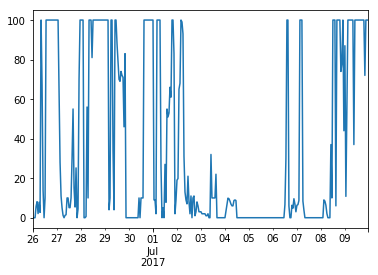

In [82]:
data['Total cloud cover  [sfc]'].plot()

In [92]:
import weatherfeed as wf
import sunradiation as sun


In [38]:
coords_grenoble = (45.1973288, 5.7139923)

startday = pd.to_datetime('26/06/2017', format='%d/%m/%Y').tz_localize('Europe/Paris')
lastday =  pd.to_datetime('10/07/2017', format='%d/%m/%Y').tz_localize('Europe/Paris')

In [39]:
weatherdata = wf.buildmultidayDF(startday, lastday, coords_grenoble )

26, 27, 28, 29, 30, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, done


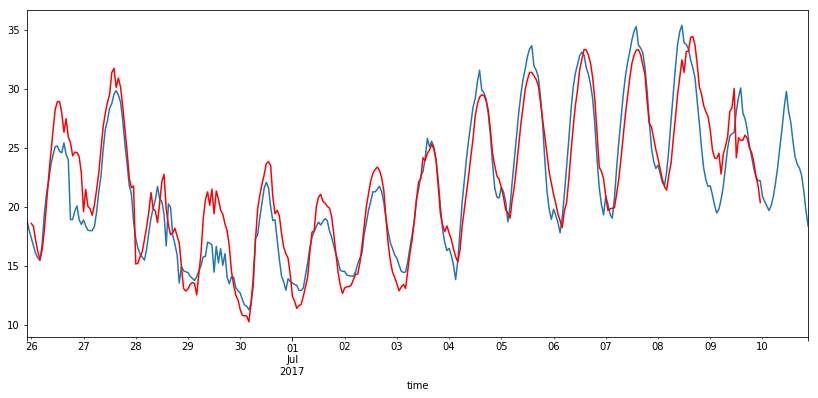

In [83]:
weatherdata['temperature'].plot( figsize=(14, 6))
data['Temperature  [2 m above gnd]'].plot(style='r')

In [84]:
data.index.dayofyear

Int64Index([177, 177, 177, 177, 177, 177, 177, 177, 177, 177,
            ...
            190, 190, 190, 190, 190, 190, 190, 190, 190, 190],
           dtype='int64', length=336)

In [87]:
zoom_mask = data.index.map(lambda x: x.dayofyear) == 185

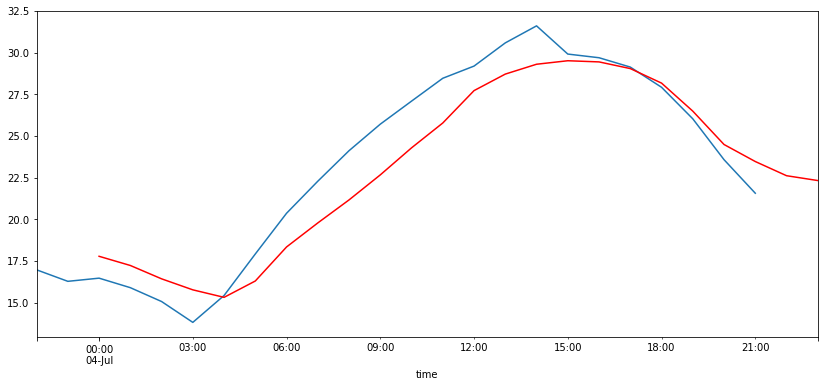

In [88]:
weatherdata['temperature'].loc[ zoom_mask].plot( figsize=(14, 6))
data['Temperature  [2 m above gnd]'].loc[ zoom_mask].plot(style='r')

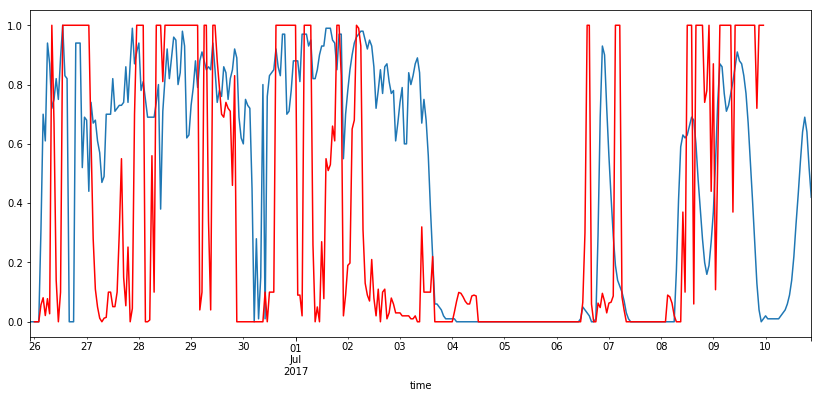

In [89]:
weatherdata['cloudCover'].plot( figsize=(14, 6))
cc = data['Total cloud cover  [sfc]']/100
cc.plot(style='r')

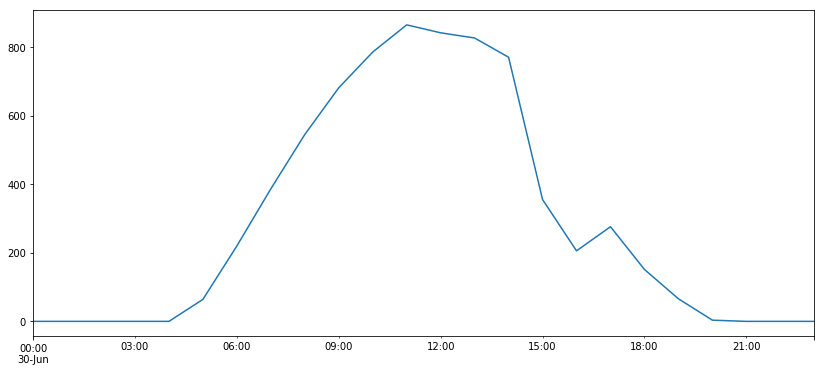

In [106]:
zoom_mask = data.index.map(lambda x: x.dayofyear) == 181
data['Shortwave Radiation - backwards  [sfc]'].loc[zoom_mask].plot(figsize=(14, 6))

In [93]:
sundata = sun.buildmultidayDF( coords_grenoble, weatherdata.index, cloudCover = weatherdata['cloudCover']  )

/home/etienne/Projets/thermique_appart/py3/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


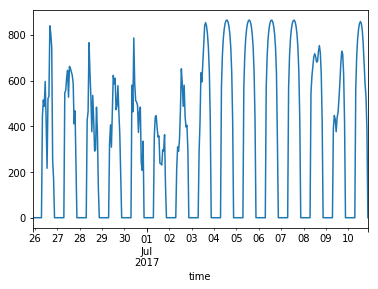

In [94]:
sundata['I0'].plot()

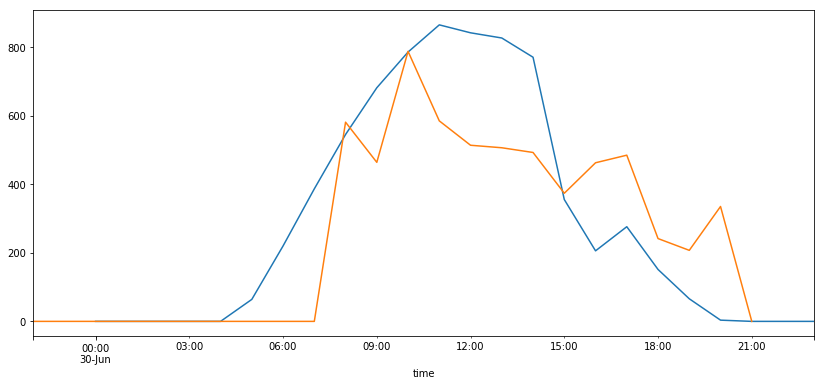

In [107]:
zoom_mask = data.index.map(lambda x: x.dayofyear) == 181
data['Shortwave Radiation - backwards  [sfc]'].loc[zoom_mask].plot(figsize=(14, 6))
sundata['I0'].loc[zoom_mask].plot()

# surface horizontal  vs   dans direction du soleil